# **Setup**

In [ ]:
!pip install -q transformers[sentencepiece] fastbook fastai nbdev plum-dispatch evaluate seqeval onnxruntime onnx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 29.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.6/72.6 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.4/17.4 MB 75.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.5/17.5 MB 54.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.2/94.2 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.4/70.4 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 23.5 MB/s eta 0:00:00


In [ ]:
!pip install fastprogress==0.2.5 -q

In [ ]:
!git clone https://github.com/msi1427/blurr.git
%cd blurr

Cloning into 'blurr'...
remote: Enumerating objects: 5063, done.
remote: Counting objects: 100% (894/894), done.
remote: Compressing objects: 100% (311/311), done.
remote: Total 5063 (delta 705), reused 702 (delta 576), pack-reused 4169 (from 1)
Receiving objects: 100% (5063/5063), 26.85 MiB | 16.29 MiB/s, done.
Resolving deltas: 100% (3934/3934), done.
/content/blurr


In [ ]:
import torch
from transformers import AutoModelForSequenceClassification, AutoConfig
from fastai.text.all import *
from blurr.text.data.all import *
from blurr.text.modeling.all import *

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_path = '/content/drive/MyDrive/Data Science/CP3_Skill Classifier'

# **Data**

In [ ]:
import pandas as pd
import os
from tqdm import tqdm
import numpy as np

In [ ]:
# merge csv files

# files_data_path =  '/content/drive/MyDrive/Data Science/CP3_Skill Classifier/data'
# csv_files = [f for f in os.listdir(files_data_path) if f.endswith('.csv')]

# data_frame = []

# for file in tqdm(csv_files, desc='Loading csv files'):
#   file_path = os.path.join(files_data_path, file)
#   df = pd.read_csv(file_path)
#   data_frame.append(df)

# merged_df = pd.concat(data_frame, ignore_index=True)
# save_path = os.path.join(files_data_path, 'merged_data.csv')
# merged_df.to_csv(save_path, index=False)

In [ ]:
# load data
df = pd.read_csv('/content/drive/MyDrive/Data Science/CP3_Skill Classifier/data/job_description_details_merged.csv')

In [ ]:
df.shape

(26628, 9)

In [ ]:
df = df.drop(['company','location','salary','job_type','scraped_at','search_term'], axis=1, errors='ignore')

In [ ]:
df.head()

,job_url,title,job_description
0,https://www.indeed.com/rc/clk?jk=30004c91028a89fc&bb=mwe0i5XWaAPLfcRuq83t2zcDFYMulFgGJ-OXx1jczyNSQkc-0RGjHF8WtS-4dD0cYuBvYBKdThPawTcDGupUv4vKEXy6ZAtHt13Y0F33zVemRXIJBgkhetaZyv7hqb6sNJfi9XGd4HvmKYQlsOJF6aDmKfEqoawW&xkcb=SoDg67M3rr6gcbyJ5x0ObzkdCdPP&fccid=1bf91941851502d5&cmp=Quadrant-Technologies&ti=Full+Stack+Developer&vjs=3,NaN,NaN
1,https://www.indeed.com/rc/clk?jk=f157bf1dbeefd084&bb=m9RG7v5lRw2rGszMCeVVyHk7Av-6nmTONcuJySpm1RLmKHqCOAUOTu0ZnrF5mTHBFaTEoAJi_L_Q_9HjbfETD7JmLssENtQhb2HmukiYWYhGAc77slyCzxoyZAB2H215HldyKX11DsNPRcgai6UnCS3_gUqUDVml&xkcb=SoCK67M3rr4wSzSsTJ0GbzkdCdPP&fccid=dd616958bd9ddc12&vjs=3,NaN,NaN
2,https://www.indeed.com/rc/clk?jk=8f55771c8ec493ed&bb=GiebJ7j60o2dgNvdFhdm6u-UI94O41pCRMncyUB3RnEf8F8swt_jNXo5RQVA5dJbXAJpJu24zOSg-aMuB7tBZyKuCHiTkNGaK_7fBd5eAgmUGXwDVLrlbqHH0AAuOpUgyfzWnfYMi0rv36DpFZX_yGXEa0ouvh9A&xkcb=SoDz67M3rr5U0aSsbh0ObzkdCdPP&fccid=43687eef14e26aa1&vjs=3,NaN,NaN
3,https://www.indeed.com/rc/clk?jk=40216dabf53625bb&bb=picpFUMdRHYiSWmFzDrkGEsse_AY4NzaAJhEz1sH8TaB648GTPkzSTTUWyAlrQAho1nu7dHSLFgt6qR6yOEqzBR4v5tqbeypt9BznpVObXb63qurzArx3WOZ-v9MOLXkYE2g4N8JrVzU9Y2IEzGzpNJx28y8JnMV&xkcb=SoCP67M3rr5LwxxNTp0ObzkdCdPP&fccid=c9215f77446452bb&vjs=3,NaN,NaN
4,https://www.indeed.com/rc/clk?jk=c958dedfc005da7b&bb=g_ghKA-AJdCW7e2m2Vn9Kga1lrDPZ7Q8ohnkF4QmJwv5TPPPHTL3a0S088rQR0TsKCKOb5SQh5VL_WyQzwEkwuWFnQ5Jyxfl9tXiy6wpRPt7sp23jlcdm-3Bc6ouD2Vq4bLkmk08DXq7xIMnQO9YdojWvtXhjuOs&xkcb=SoBJ67M3rrn5lKSkFR0FbzkdCdPP&fccid=4e64238c89e14944&cmp=Tangspac-Consulting-Pte-Ltd&ti=Full+Stack+Developer&vjs=3,NaN,NaN


In [ ]:
df.isnull().sum()

,0
job_url,0
title,662
job_description,2103


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

,0
job_url,0
title,0
job_description,0


In [ ]:
# checking for duplicates
df['job_url'].duplicated().sum()

np.int64(1667)

In [ ]:
df = df.drop_duplicates(subset='job_url', keep='first')

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.shape

(22858, 3)

In [ ]:
skill_patterns = {
    # Programming Languages
    'Python': r'\bpython\b',
    'Java': r'\bjava\b(?!script)',
    'C/C++': r'\b(c\+\+|cpp|cplusplus|c programming|(?<!\w)c(?!\+\+|\#|\w))\b',
    'SQL': r'\b(sql|structured query language|mysql|postgresql|tsql|pl/sql|mssql)\b',
    'R': r'\b(r programming|(?<!\w)r(?!\w))\b',
    'JavaScript': r'\b(javascript|js|ecmascript)\b',

    # AI/ML/Data Science
    'Machine Learning': r'\b(machine learning|ml|maching learning)\b',
    'Deep Learning': r'\b(deep learning|dl|neural networks)\b',
    'Artificial Intelligence': r'\b(artificial intelligence|ai)\b',
    'Natural Language Processing': r'\b(natural language processing|nlp|text analytics)\b',
    'Data Analysis': r'\b(data analysis|data analytics|analyzing data)\b',
    'Data Visualization': r'\b(data visualization|data viz|dataviz|visualizing data)\b',
    'EDA': r'\b(eda|exploratory data analysis|exploratory analysis)\b',
    'Data Cleaning & Wrangling': r'\b(data cleaning|data wrangling|data preprocessing|data preparation)\b',
    'Data Modeling': r'\b(data modeling|data modelling|dimensional modeling)\b',
    'Big Data Technologies': r'\b(big data|hadoop|spark|apache spark|hive|kafka|flink)\b',
    'A/B Testing': r'\b(a/b testing|ab testing|a b testing|split testing)\b',
    'PyTorch': r'\b(pytorch|torch)\b',
    'LLM': r'\b(llm|large language model|language model|gpt|bert|transformer)\b',

    # Development
    'Web Development': r'\b(web development|web dev|website development)\b',
    'Front End Development': r'\b(front[\s-]?end|frontend|front[\s-]?end development|client[\s-]?side|fe development)\b',
    'Back End Development': r'\b(back[\s-]?end|backend|back[\s-]?end development|server[\s-]?side|be development)\b',
    'Mobile App Development': r'\b(mobile|mobile app|mobile development|mobile application)\b',
    'Android Development': r'\b(android|android development|android studio|kotlin)\b',
    'iOS Development': r'\b(ios|ios development|swift|objective[\s-]?c)\b',
    'API Development': r'\b(api|rest api|restful|api development|web services|microservices api)\b',

    # Frameworks & Libraries
    'React': r'\b(react|reactjs|react\.js)\b',
    'Node.js': r'\b(node|nodejs|node\.js)\b',
    'Django': r'\bdjango\b',
    'Flask': r'\bflask\b',

    # Cloud & Infrastructure
    'Cloud Computing': r'\b(cloud|cloud computing|cloud services)\b',
    'AWS': r'\b(aws|amazon web services)\b',
    'Azure': r'\b(azure|microsoft azure|ms azure)\b',
    'GCP': r'\b(gcp|google cloud platform|google cloud)\b',
    'DevOps': r'\b(devops|dev[\s-]?ops)\b',
    'Docker': r'\b(docker|containerization)\b',
    'Kubernetes': r'\b(kubernetes|k8s)\b',
    'CI/CD': r'\b(ci/cd|ci cd|cicd|continuous integration|continuous deployment|continuous delivery)\b',
    'Containerization': r'\b(containerization|containers|docker|kubernetes)\b',
    'Microservices': r'\b(microservices|micro[\s-]?services|microservice architecture)\b',
    'Site Reliability Engineering': r'\b(site reliability engineering|sre|reliability engineering)\b',
    'Systems Administration': r'\b(systems administration|system administration|sysadmin|sys admin)\b',

    # Version Control & Tools
    'Git Version Control': r'\b(git|version control|source control)\b',
    'Git': r'\bgit\b',
    'GitHub': r'\b(github|git hub)\b',
    'Excel': r'\b(excel|ms excel|microsoft excel|spreadsheet)\b',
    'Power BI': r'\b(power bi|powerbi|power[\s-]?bi)\b',
    'Tableau': r'\b(tableau)\b',

    # Database & Data Engineering
    'Database Management': r'\b(database|database management|dbms|rdbms|database administration|dba)\b',
    'ETL': r'\b(etl|extract transform load|data pipelines)\b',
    'Data Pipelines': r'\b(data pipelines|data pipeline|pipeline|airflow)\b',
    'Business Intelligence': r'\b(business intelligence|bi|business analytics)\b',

    # Design & Engineering
    'UI/UX Design': r'\b(ui/ux|ui ux|ux/ui|ui & ux|ux & ui|user interface|user experience|ux design|ui design|ux|ui)\b',  # Catches UI, UX, or both
    'CAD Design': r'\b(cad|computer aided design|autocad|solidworks)\b',
    'System Design': r'\b(system design|systems design|architecture design|solution design)\b',

    # Security & Testing
    'Cybersecurity': r'\b(cybersecurity|cyber security|information security|infosec|security)\b',
    'Software Testing': r'\b(software testing|testing|qa testing|test automation)\b',
    'Quality Assurance': r'\b(quality assurance|qa|software quality)\b',
    'Automation Testing': r'\b(automation testing|test automation|automated testing|selenium|cypress)\b',

    # Technical Concepts
    'Computer Networking': r'\b(computer networking|networking|network|tcp/ip|lan/wan)\b',
    'Embedded Systems': r'\b(embedded systems|embedded|firmware|microcontroller)\b',
    'Internet of Things': r'\b(internet of things|iot)\b',
    'Robotics': r'\b(robotics|robot|robotic)\b',
    'Automation': r'\b(automation|automate|automated)\b',
    'Software Engineering Principles': r'\b(software engineering|engineering principles|best practices|design patterns|solid principles)\b',
    'Object-Oriented Programming': r'\b(object[\s-]?oriented programming|oop|object[\s-]?oriented)\b',
    'Data Structures & Algorithms': r'\b(data structures|algorithms|dsa|data structures and algorithms)\b',
    'IT Support': r'\b(it support|technical support|help desk|tech support)\b',

    # Soft Skills
    'Communication': r'\b(communication|communicate|verbal|written communication|interpersonal)\b',
    'Teamwork': r'\b(teamwork|team work|team collaboration|working in teams)\b',
    'Leadership': r'\b(leadership|lead|leading teams|team leadership)\b',
    'Problem Solving': r'\b(problem solving|problem[\s-]?solving|troubleshooting)\b',
    'Adaptability': r'\b(adaptability|adaptable|flexible|flexibility)\b',
    'Creativity': r'\b(creativity|creative|innovation|innovative)\b',
    'Time Management': r'\b(time management|time[\s-]?management|prioritization)\b',
    'Attention to Detail': r'\b(attention to detail|detail[\s-]?oriented|meticulous)\b',
    'Critical Thinking': r'\b(critical thinking|analytical thinking|critical analysis)\b',
    'Decision Making': r'\b(decision making|decision[\s-]?making|decisiveness)\b',
    'Collaboration': r'\b(collaboration|collaborative|collaborate)\b',
    'Work Ethic': r'\b(work ethic|strong work ethic|dedicated|dedication)\b',
    'Emotional Intelligence': r'\b(emotional intelligence|eq|empathy|empathetic)\b',
    'Self-Motivation': r'\b(self[\s-]?motivation|self[\s-]?motivated|self[\s-]?starter|proactive)\b',
    'Flexibility': r'\b(flexibility|flexible|adaptable)\b',
}


for skill, pattern in skill_patterns.items():
    df[skill] = df['job_description'].str.contains(
        pattern,
        case=False,
        na=False,
        regex=True
    ).astype(int)

In [ ]:
skills = [
    # Technical Skills
    'Python', 'Java', 'C/C++', 'SQL', 'Machine Learning', 'Deep Learning',
    'Data Analysis', 'Data Visualization', 'Web Development', 'Front End Development',
    'Back End Development', 'Cloud Computing', 'DevOps', 'Cybersecurity',
    'Computer Networking', 'Database Management', 'Software Testing',
    'UI/UX Design', 'Mobile App Development', 'Artificial Intelligence',
    'Natural Language Processing', 'Embedded Systems', 'Internet of Things',
    'CAD Design', 'Robotics', 'Automation', 'API Development', 'Excel', 'Power BI',
    'Git Version Control', 'R', 'JavaScript', 'Tableau', 'Git', 'GitHub', 'Docker',
    'Kubernetes', 'AWS', 'Azure', 'GCP', 'React', 'Node.js',
    'Django', 'Flask', 'Android Development', 'iOS Development',
    'EDA','PyTorch','' 'Data Cleaning & Wrangling', 'Business Intelligence',
    'Data Modeling', 'ETL', 'Data Pipelines', 'Big Data Technologies', 'A/B Testing',
    'Microservices', 'System Design', 'Software Engineering Principles',
    'Object-Oriented Programming', 'Data Structures & Algorithms', 'CI/CD',
    'Containerization', 'Site Reliability Engineering', 'Systems Administration',
    'IT Support', 'Quality Assurance', 'Automation Testing', 'LLM',

    # Soft Skills
    'Communication', 'Teamwork', 'Leadership', 'Problem Solving', 'Adaptability',
    'Creativity', 'Time Management', 'Attention to Detail', 'Critical Thinking',
    'Decision Making', 'Collaboration', 'Work Ethic', 'Emotional Intelligence',
    'Self-Motivation', 'Flexibility'
]

In [ ]:
df.head(2)

,job_url,title,job_description,Python,Java,C/C++,SQL,R,JavaScript,Machine Learning,...,Creativity,Time Management,Attention to Detail,Critical Thinking,Decision Making,Collaboration,Work Ethic,Emotional Intelligence,Self-Motivation,Flexibility
657,https://www.indeed.com/rc/clk?jk=73b5c238fe0e6303&bb=zZKk4GPd03d9egsQxsn3kO9skDJOM_mvk2M2EWUn-_F5kxJTC_pWEzoI-OeNbUvp7S6QOxAIcqNGyg4R4ItV8SChU9qpEpUhfEKfuD7yF-rM2ON5nqZOnqwuS2TOQ5rlSEm3xO12bnHiyquDWjHiNw%3D%3D&xkcb=SoD367M3rqeC0CSl1R0BbzkdCdPP&fccid=fcca639559bdd82a&vjs=3,Data Scientist - Product DS,"Best Egg is a market-leading, tech-enabled financial platform helping people build financial confidence through a variety of installment lending solutions and financial health tools. We aim to help customers make smart financial decisions and stay on track, so they can be money confident no matter what life throws at them.\nWe offer top-tier benefits and growth opportunities in a culture built on our core values:\n\nPut People First – We foster an inclusive, flexible, and fun workplace.\nCreate Clarity – Open communication drives trust and results.\nGet Things Done – We focus, prioritize, ...",1,0,0,1,0,0,1,...,1,0,0,0,0,1,0,0,0,1
658,https://www.indeed.com/rc/clk?jk=ea79974ba1e60c2d&bb=KdZ-UDfEWbelc9dxMB_Pgg2lsrBaV1gUTAFPOSdxIfjHI-UZUu52amClVfvIv6trPtjqyjhMIYB-AgAfXc_hExzMZ-YuzXLgSyVf_8gMCUJNK78N_mCc_kShrxuizQalfJ3Efeh8nn53dsT5HLmi3w%3D%3D&xkcb=SoBD67M3rqd6DVADMD0PbzkdCdPP&fccid=5494ce7371c01502&vjs=3,Senior Data Scientist,"Headway's mission is a big one – to build a new mental health care system everyone can access. We've built technology that helps people find great therapists with the first software-enabled national network of providers accepting insurance.\n1 in 4 people in the US have a treatable mental health condition, but the majority of providers don't accept insurance, making therapy too expensive for most people. Headway is building a new mental healthcare system that everyone can access by making it easy for therapists to accept insurance and scale their practice.\nHeadway was founded in 2019. Sin...",1,0,0,1,1,0,0,...,0,0,0,0,1,1,0,0,1,1


In [ ]:
label_counts = df[skills].sum().sort_values(ascending=False)

In [ ]:
label_counts.head(10)

,0
Collaboration,15167
Communication,14959
Creativity,10503
Problem Solving,10227
Automation,8815
Leadership,8718
Cybersecurity,8711
Software Testing,8631
Software Engineering Principles,8379
Python,8153


In [ ]:
label_counts.tail(10)

,0
iOS Development,749
Systems Administration,727
Android Development,685
Data Cleaning & Wrangling,578
Emotional Intelligence,563
Site Reliability Engineering,529
Django,317
EDA,216
A/B Testing,216
Flask,176


In [ ]:
skill_id = {skill: i for i, skill in enumerate(skills)}

with open("skill_mapping.json", "w") as f:
    json.dump(skill_id, f)

print(list(skill_id.keys()) == skills)

True


In [ ]:
df[skills].values

array([[1, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 0, 1, 1],
       [1, 1, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
# from google.colab import files
# files.download('skill_mapping.json')

# **Dataloaders and Modeling (DistilRoberta-Base)**

In [ ]:
labels = skills

In [ ]:
model_name = "distilroberta-base"
model_cls = AutoModelForSequenceClassification
config = AutoConfig.from_pretrained(model_name)
config.num_labels = len(labels)

hf_arch, hf_config, hf_tokenizer, hf_model = get_hf_objects(model_name, model_cls=model_cls, config=config)
hf_model.config.problem_type = "multi_label_classification"

In [ ]:
import os

dblocks = (
    TextBlock(hf_arch, hf_config, hf_tokenizer, hf_model),
    MultiCategoryBlock(vocab=labels)
)

def get_y_skills(row):
    return [skill for skill in labels if row[skill] == 1]

dblock = DataBlock(blocks=dblocks, get_x=ColReader('job_description'), get_y=get_y_skills, splitter=RandomSplitter(valid_pct=0.2, seed=42))
dls = dblock.dataloaders(df, bs=32)

output_dir = os.path.join(data_path,"dataloaders")
torch.save(dls, os.path.join(output_dir, "dls-multilabel-skill-classifier.pkl"))

In [ ]:
def get_y_skills(row):
    return [skill for skill in labels if row[skill] == 1]
dls = torch.load("/content/drive/MyDrive/Data Science/CP3_Skill Classifier/dataloaders/dls-multilabel-skill-classifier.pkl", weights_only=False)

In [ ]:
dls.vocab

In [ ]:
model = BaseModelWrapper(hf_model)
acc_061 = partial(accuracy_multi, thresh=0.61)

learner = Learner(dls,
                  model,
                  opt_func=partial(OptimWrapper, opt=torch.optim.AdamW),
                  loss_func=BCEWithLogitsLossFlat(),
                  metrics=[acc_061],
                  cbs=[BaseModelCallback],
                  splitter=blurr_splitter
                  ).to_fp16()

## **Stage-0**

In [ ]:
learner.freeze()

In [ ]:
learner.lr_find(suggest_funcs=[slide,valley])

In [ ]:
learner.fit_one_cycle(3,2e-4)

In [ ]:
learner.save("skill-classifier-stage-0")

In [ ]:
output_dir = os.path.join(data_path,"models")
learner.export(os.path.join(output_dir,"skill-classifier-stage-0.pkl"))

## **Stage-1**

In [ ]:
from fastai.learner import load_learner
learner = load_learner("/content/drive/My Drive/Data Science/CP3/models/skill-classifier-stage-0.pkl")

In [ ]:
learner.unfreeze()

In [ ]:
print(f"Train dataloader length: {len(learner.dls.train)}")

In [ ]:
learner.lr_find(suggest_funcs=[slide, valley])

In [ ]:
learner.fit_one_cycle(5, lr_max=slice(3.5e-6, 3e-3))

In [ ]:
preds, targs = learner.get_preds()
preds_probs = torch.sigmoid(preds)
preds_binary = (preds_probs > 0.61).numpy()
targs_binary = targs.numpy()

from sklearn.metrics import f1_score

print(f"Accuracy:   0.9700")
print(f"F1-Samples: {f1_score(targs_binary, preds_binary, average='samples'):.4f}")
print(f"F1-Macro:   {f1_score(targs_binary, preds_binary, average='macro'):.4f}")
print(f"F1-Micro:   {f1_score(targs_binary, preds_binary, average='micro'):.4f}")

In [ ]:
learner.save("skill-classifier-stage-1")

In [ ]:
output_dir = os.path.join(data_path,"models")
learner.export(os.path.join(output_dir,"skill-classifier-stage-1.pkl"))

# **Dataloaders and Modeling (ModernBERT-base)**

In [ ]:
labels = skills

In [ ]:
model_name = "answerdotai/ModernBERT-base"
model_cls = AutoModelForSequenceClassification
config = AutoConfig.from_pretrained(model_name)
config.num_labels = len(labels)
config.gradient_checkpointing = True

hf_arch, hf_config, hf_tokenizer, hf_model = get_hf_objects(model_name, model_cls=model_cls, config=config)
hf_model.config.problem_type = "multi_label_classification"

config.json: 0.00B [00:00, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/694 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/599M [00:00<?, ?B/s]

In [ ]:
dblocks = (
    TextBlock(hf_arch, hf_config, hf_tokenizer, hf_model),
    MultiCategoryBlock(vocab=labels)
)

def get_y_skills(row):
    return [skill for skill in labels if row[skill] == 1]

dblock = DataBlock(blocks=dblocks, get_x=ColReader('job_description'), get_y=get_y_skills, splitter=RandomSplitter(valid_pct=0.2, seed=42))
dls = dblock.dataloaders(df, bs=8)

# output_dir = os.path.join(data_path,"dataloaders")
# torch.save(dls, os.path.join(output_dir, "dls-electra.pkl"))

In [ ]:
model = BaseModelWrapper(hf_model)
acc = partial(accuracy_multi, thresh=0.6)

learner = Learner(dls,
                  model,
                  opt_func=partial(OptimWrapper, opt=torch.optim.AdamW),
                  loss_func=BCEWithLogitsLossFlat(),
                  metrics=[acc],
                  cbs=[BaseModelCallback],
                  splitter=blurr_splitter
                  ).to_fp16()

## **Stage - 0**

In [ ]:
learner.freeze()

SuggestedLRs(slide=0.009120108559727669, valley=0.0004786300996784121)

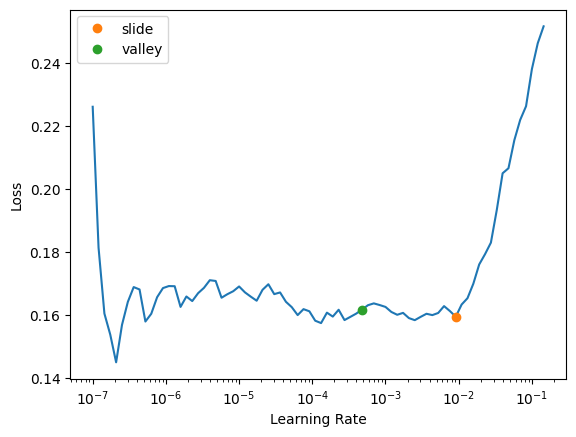

In [ ]:
learner.lr_find(suggest_funcs=[slide,valley])

In [ ]:
learner.fit_one_cycle(1,5e-4)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.076706,0.073638,0.974475,30:44


In [ ]:
learner.save("skill-classifier-modernbert-stage-0")

Path('models/skill-classifier-modernbert-stage-0.pth')

In [ ]:
output_dir = os.path.join(data_path,"models")
learner.export(os.path.join(output_dir,"skill-classifier-modernbertstage-0.pkl"))

## **Stage-1**

In [ ]:
from fastai.learner import load_learner
learner = load_learner(os.path.join(data_path,"models","skill-classifier-modernbertstage-0.pkl"))

In [ ]:
learner.unfreeze()

SuggestedLRs(slide=0.002511886414140463, valley=1.2022644114040304e-05)

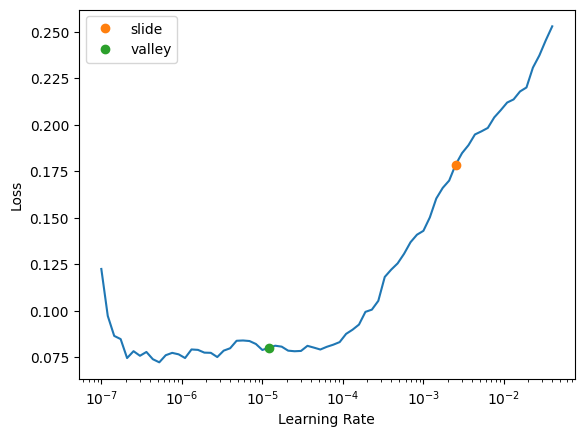

In [ ]:
learner.lr_find(suggest_funcs=[slide, valley])

In [ ]:
learner.fit_one_cycle(5, lr_max=slice(1.2e-5, 2.5e-3))

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.034036,0.039747,0.985507,34:31
1,0.012631,0.016105,0.995457,34:25
2,0.005342,0.005245,0.998730,34:23
3,0.000847,0.002182,0.999618,34:15
4,0.000214,0.001988,0.999676,34:09


In [ ]:
# Threshold finder
from sklearn.metrics import f1_score
import numpy as np

preds, targs = learner.get_preds()
preds_probs = torch.sigmoid(preds)
targs_np = targs.numpy()

print("FINDING OPTIMAL THRESHOLD")
print("="*70)

best_f1 = 0
best_thresh = 0.5
best_metrics = {}


for thresh in np.arange(0.30, 0.80, 0.01):
    preds_binary = (preds_probs > thresh).numpy()

    # Calculate metrics
    avg_preds = preds_binary.sum(axis=1).mean()
    f1_samples = f1_score(targs_np, preds_binary, average='samples', zero_division=0)
    f1_macro = f1_score(targs_np, preds_binary, average='macro', zero_division=0)
    f1_micro = f1_score(targs_np, preds_binary, average='micro', zero_division=0)


    if avg_preds > 0.1:
        print(f"Thresh {thresh:.2f}: Avg preds={avg_preds:5.2f}, "
              f"F1-Samples={f1_samples:.4f}, F1-Macro={f1_macro:.4f}, F1-Micro={f1_micro:.4f}")


        if f1_samples > best_f1:
            best_f1 = f1_samples
            best_thresh = thresh
            best_metrics = {
                'f1_samples': f1_samples,
                'f1_macro': f1_macro,
                'f1_micro': f1_micro,
                'avg_preds': avg_preds
            }

print("\n" + "="*70)
print(f"✓ OPTIMAL THRESHOLD: {best_thresh:.2f}")
print(f"✓ Best F1-Samples: {best_f1:.4f}")
print(f"✓ Avg predictions: {best_metrics['avg_preds']:.2f}")
print(f"✓ Avg true labels: {targs_np.sum(axis=1).mean():.2f}")
print("="*70)

FINDING OPTIMAL THRESHOLD
Thresh 0.30: Avg preds=83.00, F1-Samples=0.2498, F1-Macro=0.2366, F1-Micro=0.2573
Thresh 0.31: Avg preds=83.00, F1-Samples=0.2498, F1-Macro=0.2366, F1-Micro=0.2573
Thresh 0.32: Avg preds=83.00, F1-Samples=0.2498, F1-Macro=0.2366, F1-Micro=0.2573
Thresh 0.33: Avg preds=83.00, F1-Samples=0.2498, F1-Macro=0.2366, F1-Micro=0.2573
Thresh 0.34: Avg preds=83.00, F1-Samples=0.2498, F1-Macro=0.2366, F1-Micro=0.2573
Thresh 0.35: Avg preds=83.00, F1-Samples=0.2498, F1-Macro=0.2366, F1-Micro=0.2573
Thresh 0.36: Avg preds=83.00, F1-Samples=0.2498, F1-Macro=0.2366, F1-Micro=0.2573
Thresh 0.37: Avg preds=83.00, F1-Samples=0.2498, F1-Macro=0.2366, F1-Micro=0.2573
Thresh 0.38: Avg preds=83.00, F1-Samples=0.2498, F1-Macro=0.2366, F1-Micro=0.2573
Thresh 0.39: Avg preds=83.00, F1-Samples=0.2498, F1-Macro=0.2366, F1-Micro=0.2573
Thresh 0.40: Avg preds=83.00, F1-Samples=0.2498, F1-Macro=0.2366, F1-Micro=0.2573
Thresh 0.41: Avg preds=83.00, F1-Samples=0.2498, F1-Macro=0.2366, F1-Mic

In [ ]:
preds, targs = learner.get_preds()
preds_probs = torch.sigmoid(preds)
preds_binary = (preds_probs > 0.59).numpy()
targs_binary = targs.numpy()

from sklearn.metrics import f1_score

print(f"Accuracy:   0.9996")
print(f"F1-Samples: {f1_score(targs_binary, preds_binary, average='samples'):.4f}")
print(f"F1-Macro:   {f1_score(targs_binary, preds_binary, average='macro'):.4f}")
print(f"F1-Micro:   {f1_score(targs_binary, preds_binary, average='micro'):.4f}")

Accuracy:   0.9996
F1-Samples: 0.9928
F1-Macro:   0.9969
F1-Micro:   0.9990


In [ ]:
learner.save("skill-classifier-modernbert-stage-1")

Path('models/skill-classifier-modernbert-stage-1.pth')

In [ ]:
output_dir = os.path.join(data_path,"models")
learner.export(os.path.join(output_dir,"skill-classifier-modernbertstage-1.pkl"))

# **Dataloaders and Modeling (sentence-transformers/all-MiniLM-L6-v2)**

In [ ]:
labels = skills

In [ ]:
model_name = "sentence-transformers/all-MiniLM-L6-v2"
model_cls = AutoModelForSequenceClassification
config = AutoConfig.from_pretrained(model_name)
config.num_labels = len(labels)
config.gradient_checkpointing = True

hf_arch, hf_config, hf_tokenizer, hf_model = get_hf_objects(model_name, model_cls=model_cls, config=config)
hf_model.config.problem_type = "multi_label_classification"

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

In [ ]:
dblocks = (
    TextBlock(hf_arch, hf_config, hf_tokenizer, hf_model),
    MultiCategoryBlock(vocab=labels)
)

def get_y_skills(row):
    return [skill for skill in labels if row[skill] == 1]

dblock = DataBlock(blocks=dblocks, get_x=ColReader('job_description'), get_y=get_y_skills, splitter=RandomSplitter(valid_pct=0.2, seed=42))
dls = dblock.dataloaders(df, bs=8)

# output_dir = os.path.join(data_path,"dataloaders")
# torch.save(dls, os.path.join(output_dir, "dls-electra.pkl"))

In [ ]:
model = BaseModelWrapper(hf_model)
acc = partial(accuracy_multi, thresh=0.6)

learner = Learner(dls,
                  model,
                  opt_func=partial(OptimWrapper, opt=torch.optim.AdamW),
                  loss_func=BCEWithLogitsLossFlat(),
                  metrics=[acc],
                  cbs=[BaseModelCallback],
                  splitter=blurr_splitter
                  ).to_fp16()

## **Stage - 0**

In [ ]:
learner.freeze()

SuggestedLRs(slide=0.013182567432522774, valley=0.0008317637839354575)

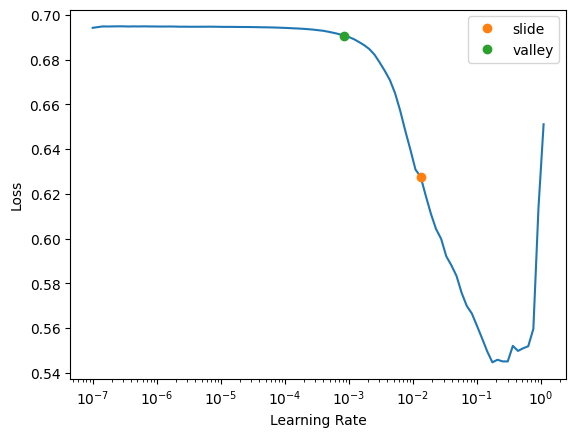

In [ ]:
learner.lr_find(suggest_funcs=[slide,valley])

In [ ]:
learner.fit_one_cycle(1,8.3e-4)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.269378,0.263671,0.886595,02:50


In [ ]:
learner.save("skill-classifier-minilm-stage-0")

Path('models/skill-classifier-minilm-stage-0.pth')

In [ ]:
output_dir = os.path.join(data_path,"models")
learner.export(os.path.join(output_dir,"skill-classifier-minilmstage-0.pkl"))

## **Stage-1**

In [ ]:
# from fastai.learner import load_learner
# learner = load_learner(os.path.join(data_path,"models","skill-classifier-modernbertstage-0.pkl"))

In [ ]:
learner.unfreeze()

SuggestedLRs(slide=0.009120108559727669, valley=4.786300905834651e-06)

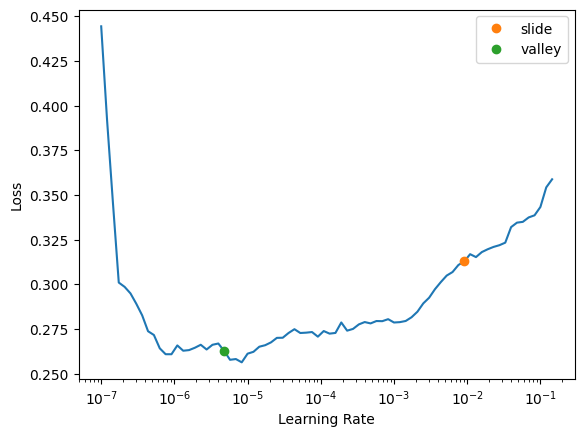

In [ ]:
learner.lr_find(suggest_funcs=[slide, valley])

In [ ]:
learner.fit_one_cycle(5, lr_max=slice(5e-6, 9e-3))

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.225290,0.198251,0.924297,03:38
1,0.164436,0.137219,0.951736,03:17
2,0.120593,0.099156,0.966017,03:58
3,0.078428,0.081507,0.973034,04:04
4,0.081722,0.077108,0.974807,03:20


In [ ]:
from sklearn.metrics import f1_score
import numpy as np


preds, targs = learner.get_preds()
preds_probs = torch.sigmoid(preds)
targs_np = targs.numpy()

print("FINDING OPTIMAL THRESHOLD")
print("="*70)

best_f1 = 0
best_thresh = 0.5
best_metrics = {}


for thresh in np.arange(0.30, 0.80, 0.01):
    preds_binary = (preds_probs > thresh).numpy()

    # Calculate metrics
    avg_preds = preds_binary.sum(axis=1).mean()
    f1_samples = f1_score(targs_np, preds_binary, average='samples', zero_division=0)
    f1_macro = f1_score(targs_np, preds_binary, average='macro', zero_division=0)
    f1_micro = f1_score(targs_np, preds_binary, average='micro', zero_division=0)


    if avg_preds > 0.1:
        print(f"Thresh {thresh:.2f}: Avg preds={avg_preds:5.2f}, "
              f"F1-Samples={f1_samples:.4f}, F1-Macro={f1_macro:.4f}, F1-Micro={f1_micro:.4f}")


        if f1_samples > best_f1:
            best_f1 = f1_samples
            best_thresh = thresh
            best_metrics = {
                'f1_samples': f1_samples,
                'f1_macro': f1_macro,
                'f1_micro': f1_micro,
                'avg_preds': avg_preds
            }

print("\n" + "="*70)
print(f"✓ OPTIMAL THRESHOLD: {best_thresh:.2f}")
print(f"✓ Best F1-Samples: {best_f1:.4f}")
print(f"✓ Avg predictions: {best_metrics['avg_preds']:.2f}")
print(f"✓ Avg true labels: {targs_np.sum(axis=1).mean():.2f}")
print("="*70)

FINDING OPTIMAL THRESHOLD
Thresh 0.30: Avg preds=83.00, F1-Samples=0.2498, F1-Macro=0.2366, F1-Micro=0.2573
Thresh 0.31: Avg preds=83.00, F1-Samples=0.2498, F1-Macro=0.2366, F1-Micro=0.2573
Thresh 0.32: Avg preds=83.00, F1-Samples=0.2498, F1-Macro=0.2366, F1-Micro=0.2573
Thresh 0.33: Avg preds=83.00, F1-Samples=0.2498, F1-Macro=0.2366, F1-Micro=0.2573
Thresh 0.34: Avg preds=83.00, F1-Samples=0.2498, F1-Macro=0.2366, F1-Micro=0.2573
Thresh 0.35: Avg preds=83.00, F1-Samples=0.2498, F1-Macro=0.2366, F1-Micro=0.2573
Thresh 0.36: Avg preds=83.00, F1-Samples=0.2498, F1-Macro=0.2366, F1-Micro=0.2573
Thresh 0.37: Avg preds=83.00, F1-Samples=0.2498, F1-Macro=0.2366, F1-Micro=0.2573
Thresh 0.38: Avg preds=83.00, F1-Samples=0.2498, F1-Macro=0.2366, F1-Micro=0.2573
Thresh 0.39: Avg preds=83.00, F1-Samples=0.2498, F1-Macro=0.2366, F1-Micro=0.2573
Thresh 0.40: Avg preds=83.00, F1-Samples=0.2498, F1-Macro=0.2366, F1-Micro=0.2573
Thresh 0.41: Avg preds=83.00, F1-Samples=0.2498, F1-Macro=0.2366, F1-Mic

In [ ]:
preds, targs = learner.get_preds()
preds_probs = torch.sigmoid(preds)
preds_binary = (preds_probs > 0.61).numpy()
targs_binary = targs.numpy()

from sklearn.metrics import f1_score

print(f"Accuracy:   0.9700")
print(f"F1-Samples: {f1_score(targs_binary, preds_binary, average='samples'):.4f}")
print(f"F1-Macro:   {f1_score(targs_binary, preds_binary, average='macro'):.4f}")
print(f"F1-Micro:   {f1_score(targs_binary, preds_binary, average='micro'):.4f}")

Accuracy:   0.9700
F1-Samples: 0.9028
F1-Macro:   0.8782
F1-Micro:   0.9081


In [ ]:
learner.save("skill-classifier-modernbert-stage-1")

Path('models/skill-classifier-modernbert-stage-1.pth')

In [ ]:
output_dir = os.path.join(data_path,"models")
learner.export(os.path.join(output_dir,"skill-classifier-modernbertstage-1.pkl"))

# **Dataloaders and Modeling (google-bert/bert-base-uncased)**

In [ ]:
labels = skills

In [ ]:
model_name = "google-bert/bert-base-uncased"
model_cls = AutoModelForSequenceClassification
config = AutoConfig.from_pretrained(model_name)
config.num_labels = len(labels)
config.gradient_checkpointing = True

hf_arch, hf_config, hf_tokenizer, hf_model = get_hf_objects(model_name, model_cls=model_cls, config=config)
hf_model.config.problem_type = "multi_label_classification"

In [ ]:
dblocks = (
    TextBlock(hf_arch, hf_config, hf_tokenizer, hf_model),
    MultiCategoryBlock(vocab=labels)
)

def get_y_skills(row):
    return [skill for skill in labels if row[skill] == 1]

dblock = DataBlock(blocks=dblocks, get_x=ColReader('job_description'), get_y=get_y_skills, splitter=RandomSplitter(valid_pct=0.2, seed=42))
dls = dblock.dataloaders(df, bs=8)

# output_dir = os.path.join(data_path,"dataloaders")
# torch.save(dls, os.path.join(output_dir, "dls-electra.pkl"))

In [ ]:
model = BaseModelWrapper(hf_model)
acc = partial(accuracy_multi, thresh=0.6)

learner = Learner(dls,
                  model,
                  opt_func=partial(OptimWrapper, opt=torch.optim.AdamW),
                  loss_func=BCEWithLogitsLossFlat(),
                  metrics=[acc],
                  cbs=[BaseModelCallback],
                  splitter=blurr_splitter
                  ).to_fp16()

## **Stage - 0**

In [ ]:
learner.freeze()

SuggestedLRs(slide=0.0012022644514217973, valley=0.0002290867705596611)

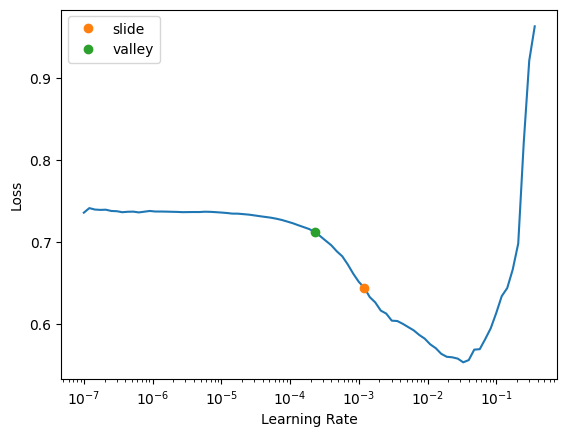

In [ ]:
learner.lr_find(suggest_funcs=[slide,valley])

In [ ]:
learner.fit_one_cycle(1,2.29e-4)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.321167,0.321292,0.865466,08:36


In [ ]:
learner.save("skill-classifier-googlebert-stage-0")

Path('models/skill-classifier-googlebert-stage-0.pth')

In [ ]:
output_dir = os.path.join(data_path,"models")
learner.export(os.path.join(output_dir,"skill-classifier-googlebertstage-0.pkl"))

## **Stage-1**

In [ ]:
from fastai.learner import load_learner
learner = load_learner(os.path.join(data_path,"models","skill-classifier-modernbertstage-0.pkl"))

In [ ]:
learner.unfreeze()

SuggestedLRs(slide=0.007585775572806597, valley=4.786300905834651e-06)

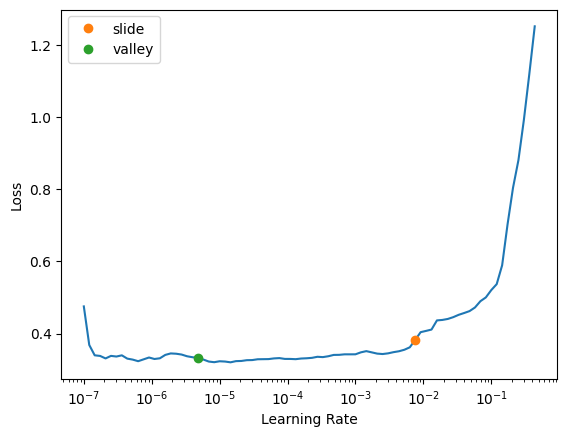

In [ ]:
learner.lr_find(suggest_funcs=[slide, valley])

In [ ]:
learner.fit_one_cycle(5, lr_max=slice(4.8e-6, 7.5e-3))

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.204121,0.191048,0.927959,11:17
1,0.126762,0.115719,0.960453,11:10
2,0.081494,0.082021,0.973590,11:10
3,0.048595,0.061385,0.981039,11:13
4,0.034466,0.058773,0.982802,11:10


In [ ]:
from sklearn.metrics import f1_score
import numpy as np

preds, targs = learner.get_preds()
preds_probs = torch.sigmoid(preds)
targs_np = targs.numpy()

print("FINDING OPTIMAL THRESHOLD")
print("="*70)

best_f1 = 0
best_thresh = 0.5
best_metrics = {}


for thresh in np.arange(0.30, 0.80, 0.01):
    preds_binary = (preds_probs > thresh).numpy()

    # Calculate metrics
    avg_preds = preds_binary.sum(axis=1).mean()
    f1_samples = f1_score(targs_np, preds_binary, average='samples', zero_division=0)
    f1_macro = f1_score(targs_np, preds_binary, average='macro', zero_division=0)
    f1_micro = f1_score(targs_np, preds_binary, average='micro', zero_division=0)


    if avg_preds > 0.1:
        print(f"Thresh {thresh:.2f}: Avg preds={avg_preds:5.2f}, "
              f"F1-Samples={f1_samples:.4f}, F1-Macro={f1_macro:.4f}, F1-Micro={f1_micro:.4f}")


        if f1_samples > best_f1:
            best_f1 = f1_samples
            best_thresh = thresh
            best_metrics = {
                'f1_samples': f1_samples,
                'f1_macro': f1_macro,
                'f1_micro': f1_micro,
                'avg_preds': avg_preds
            }

print("\n" + "="*70)
print(f"✓ OPTIMAL THRESHOLD: {best_thresh:.2f}")
print(f"✓ Best F1-Samples: {best_f1:.4f}")
print(f"✓ Avg predictions: {best_metrics['avg_preds']:.2f}")
print(f"✓ Avg true labels: {targs_np.sum(axis=1).mean():.2f}")
print("="*70)

FINDING OPTIMAL THRESHOLD
Thresh 0.30: Avg preds=83.00, F1-Samples=0.2498, F1-Macro=0.2366, F1-Micro=0.2573
Thresh 0.31: Avg preds=83.00, F1-Samples=0.2498, F1-Macro=0.2366, F1-Micro=0.2573
Thresh 0.32: Avg preds=83.00, F1-Samples=0.2498, F1-Macro=0.2366, F1-Micro=0.2573
Thresh 0.33: Avg preds=83.00, F1-Samples=0.2498, F1-Macro=0.2366, F1-Micro=0.2573
Thresh 0.34: Avg preds=83.00, F1-Samples=0.2498, F1-Macro=0.2366, F1-Micro=0.2573
Thresh 0.35: Avg preds=83.00, F1-Samples=0.2498, F1-Macro=0.2366, F1-Micro=0.2573
Thresh 0.36: Avg preds=83.00, F1-Samples=0.2498, F1-Macro=0.2366, F1-Micro=0.2573
Thresh 0.37: Avg preds=83.00, F1-Samples=0.2498, F1-Macro=0.2366, F1-Micro=0.2573
Thresh 0.38: Avg preds=83.00, F1-Samples=0.2498, F1-Macro=0.2366, F1-Micro=0.2573
Thresh 0.39: Avg preds=83.00, F1-Samples=0.2498, F1-Macro=0.2366, F1-Micro=0.2573
Thresh 0.40: Avg preds=83.00, F1-Samples=0.2498, F1-Macro=0.2366, F1-Micro=0.2573
Thresh 0.41: Avg preds=83.00, F1-Samples=0.2498, F1-Macro=0.2366, F1-Mic

In [ ]:
preds, targs = learner.get_preds()
preds_probs = torch.sigmoid(preds)
preds_binary = (preds_probs > 0.6).numpy()
targs_binary = targs.numpy()

from sklearn.metrics import f1_score

print(f"Accuracy:   0.98")
print(f"F1-Samples: {f1_score(targs_binary, preds_binary, average='samples'):.4f}")
print(f"F1-Macro:   {f1_score(targs_binary, preds_binary, average='macro'):.4f}")
print(f"F1-Micro:   {f1_score(targs_binary, preds_binary, average='micro'):.4f}")

Accuracy:   0.98
F1-Samples: 0.9304
F1-Macro:   0.9110
F1-Micro:   0.9348


In [ ]:
learner.save("skill-classifier-googlebertuncased-stage-1")

Path('models/skill-classifier-googlebertuncased-stage-1.pth')

In [ ]:
output_dir = os.path.join(data_path,"models")
learner.export(os.path.join(output_dir,"skill-classifier-googlebertuncased-1.pkl"))

# **Data Split**

In [ ]:
labels = skills

In [ ]:
len(labels)

83

In [ ]:
labels[:5]

['Python', 'Java', 'C/C++', 'SQL', 'Machine Learning']

In [ ]:
splitter = RandomSplitter(valid_pct=0.1, seed=42)
train_ids, valid_ids = splitter(df)
len(train_ids), len(valid_ids)

(20573, 2285)

In [ ]:
existing_valid_ids = [idx for idx in valid_ids if idx in df.index]
valid_df = df.loc[existing_valid_ids]
valid_df.head()

,job_url,title,job_description,Python,Java,C/C++,SQL,R,JavaScript,Machine Learning,...,Creativity,Time Management,Attention to Detail,Critical Thinking,Decision Making,Collaboration,Work Ethic,Emotional Intelligence,Self-Motivation,Flexibility
4593,https://www.indeed.com/rc/clk?jk=ec52e85b5a36778e&bb=8HSamVpDIIxqu-8QktTa4tgxIKO8H-vqMzsIHtLzHL6JhsfWGL_G4CoYpVjcGkZrmT4io0Wump1zf-SWL52rSRi051X-Rx_lLPIWpvbrmXWHmrOCV21yd28IFsmwEs_N46omIIh0e5x9TDzGSH_rULtsJmYUeplz&xkcb=SoCC67M3rr2RMTSV3R0KbzkdCdPP&fccid=6116b77c1a5422c4&vjs=3,Senior Machine Learning Engineer,"Why join Freenome?\nFreenome is a high-growth biotech company developing tests to detect cancer using a standard blood draw. To do this, Freenome uses a multiomics platform that combines tumor and non-tumor signals with machine learning to find cancer in its earliest, most-treatable stages.\nCancer is relentless. This is why Freenome is building the clinical, economic, and operational evidence to drive cancer screening and save lives. Our first screening test is for colorectal cancer (CRC) and advanced adenomas, and it's just the beginning.\nFounded in 2014, Freenome has ~400 employees and...",1,1,1,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0
16766,https://www.indeed.com/rc/clk?jk=b455474ed86f0dd0&bb=GTX8MGXv3wDWi-b5e-H1Ejkt-fqBQTqOj8Wk7LDloamQqAdMYd-27AdUUMLUYQciCdcGvsZ92Cby_GaPGn8HkDawDiLcjCMzW07nTWQLWdwuFJPfa7Yk9mSq2ktqUkFxy_UmvsucrukixOQFy828kReeGVzOoJlk&xkcb=SoD467M3rsJGSWQGah0CbzkdCdPP&fccid=a72d24fff35243e1&vjs=3,IT Help Desk II - 1st & 2nd Shift,"BENEFITS\nMedical & Vision Insurance\nSupplemental Insurance Plans Available\nDental Insurance (Company paid)\nSTD and Life & AD&D Insurance (Company paid)\n401(K) Matching\nPTO & Unpaid Excused Absences\nUniforms (Company paid)\nTraining & Apprenticeship Opportunities\nSafety Shoe & Glasses Reimbursement Program\nGym Membership Reimbursement Program\n15% Shift Premium - 2ND SHIFT ONLY\nJOB SUMMARY\nIT Help Desk II configures and maintains desktop, laptop, and mobile device operating systems and provides technical support for all Company employees. They also aid System Administrator and Ne...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11712,https://www.indeed.com/rc/clk?jk=1ed7ecec910d9e7a&bb=1bwldHO0Y5e_xERU7CZN41pphDulXSEmQM4jaVRR1UNAkIW2DJ8iz8MjiuOcypPLJaN7MdxJsBmo5z4WnbPNA-fXheUBRPVgHp24E3yF1qGPL8f17f2sNKA1vJ57-Cb9VTs5kF4Lhr_mSlG8oudRbu58VueNwa17&xkcb=SoC367M3rqpPEbgN5b0LbzkdCdPP&fccid=8bd4bed1b0ebda69&vjs=3,Deep Learning Compiler Engineer,"Quadric has created an innovative general purpose neural processing unit (GPNPU) architecture. Quadric's co-optimized software and hardware is targeted to run neural network (NN) inference workloads in a wide variety of edge and endpoint devices, ranging from battery operated smart-sensor systems to high-performance automotive or autonomous vehicle systems. Unlike other NPUs or neural network accelerators in the industry today that can only accelerate a portion of a machine learning graph, the Quadric GPNPU executes both NN graph code and conventional C++ DSP and control code.\nIf making a...",0,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0
2374,https://www.indeed.com/rc/clk?jk=152a277ec05e3cfa&bb=4yA79InukhRpGh_rF66q2-ZtE66UreI7Pd6auOomGdMvVw39voGpFZtm2fHx8YuHO5Lw6SgrfYaQQiyNGw6dKWiNYnf3h2DSWa4MsZAh6BH5GGYyhQEdl9Ig8mIvkPMBfqAS6rYsLmt6evL2JisaiFVUQOxWfthv2Av1e8QGSFA%3D&xkcb=SoA067M3rqr0SwwVr50ObzkdCdPP&fccid=e3ed794da90b8e4a&vjs=3,Business Intelligence Lead,"Passion. Purpose. Impact. CJP is at the heart of Greater Boston's Jewish community, but our reach is felt around the world. Ranked by BBJ as Massachusetts’ largest non-profit organization – CJP is a philanthropic investor and mobilizer of people, resources, and skills that make a bigger difference locally and globally.\nThe Business Intelligence (BI) Lead is responsible for transforming complex business needs into actionable insights through data analysis, reporting, and dashboard development. This includes aligning on BI strategy, designing, developing, and 

# **ONNX**

In [ ]:
model_path = "/content/drive/MyDrive/Data Science/CP3_Skill Classifier/models/skill-classifier-modernbertstage-1.pkl"

In [ ]:
learner_inf = load_learner(model_path)

In [ ]:
learner_inf.model.hf_model

ModernBertForSequenceClassification(
  (model): ModernBertModel(
    (embeddings): ModernBertEmbeddings(
      (tok_embeddings): Embedding(50368, 768, padding_idx=50283)
      (norm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (drop): Dropout(p=0.0, inplace=False)
    )
    (layers): ModuleList(
      (0): ModernBertEncoderLayer(
        (attn_norm): Identity()
        (attn): ModernBertAttention(
          (Wqkv): Linear(in_features=768, out_features=2304, bias=False)
          (rotary_emb): ModernBertRotaryEmbedding()
          (Wo): Linear(in_features=768, out_features=768, bias=False)
          (out_drop): Identity()
        )
        (mlp_norm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): ModernBertMLP(
          (Wi): Linear(in_features=768, out_features=2304, bias=False)
          (act): GELUActivation()
          (drop): Dropout(p=0.0, inplace=False)
          (Wo): Linear(in_features=1152, out_features=768, bias=False)
        )
      

In [ ]:
classifier = learner_inf.model.hf_model.eval()

class SkillClassifierModel(torch.nn.Module):
    def __init__(self, hf_model):
        super().__init__()
        self.hf_model = hf_model

    def forward(self, input_ids, attention_mask=None):
        output = self.hf_model(input_ids=input_ids, attention_mask=attention_mask)
        return output.logits

wrapped_model = SkillClassifierModel(learner_inf.model.hf_model)

dummy_input_ids = torch.LongTensor([[0] * 512])
dummy_attention_mask = torch.LongTensor([[1] * 512])

torch.onnx.export(
    wrapped_model,
    (dummy_input_ids, dummy_attention_mask),
    '/content/drive/MyDrive/Data Science/CP3_Skill Classifier/models/skill-classifier.onnx',
    verbose=True,
    input_names=['input_ids', 'attention_mask'],
    output_names=['logits'],
    opset_version=18,
    dynamic_axes={
        'input_ids': {0: 'batch_size', 1: 'sequence_len'},
        'attention_mask': {0: 'batch_size', 1: 'sequence_len'},
        'logits': {0: 'batch_size'}
    }
)

[torch.onnx] Obtain model graph for `SkillClassifierModel([...]` with `torch.export.export(..., strict=False)`...
[torch.onnx] Obtain model graph for `SkillClassifierModel([...]` with `torch.export.export(..., strict=False)`... ✅
[torch.onnx] Run decomposition...
[torch.onnx] Run decomposition... ✅
[torch.onnx] Translate the graph into ONNX...
[torch.onnx] Translate the graph into ONNX... ✅
Applied 41 of general pattern rewrite rules.


ONNXProgram(
    model=
        <
            ir_version=10,
            opset_imports={'': 18},
            producer_name='pytorch',
            producer_version='2.9.0+cu126',
            domain=None,
            model_version=None,
        >
        graph(
            name=main_graph,
            inputs=(
                %"input_ids"<INT64,[s72,s53]>,
                %"attention_mask"<INT64,[s43,s53]>
            ),
            outputs=(
                %"logits"<FLOAT,[1,83]>
            ),
            initializers=(
                %"hf_model.roberta.embeddings.word_embeddings.weight"<FLOAT,[50265,768]>{TorchTensor(...)},
                %"hf_model.roberta.embeddings.position_embeddings.weight"<FLOAT,[514,768]>{TorchTensor(...)},
                %"hf_model.roberta.embeddings.token_type_embeddings.weight"<FLOAT,[1,768]>{TorchTensor(...)},
                %"hf_model.roberta.embeddings.LayerNorm.weight"<FLOAT,[768]>{TorchTensor(...)},
                %"hf_model.roberta.embeddings.Lay

In [ ]:
!pip install onnxscript

classifier = learner_inf.model.hf_model.eval()

# Creating dummy input

dummy_input_ids = torch.ones(1,512, dtype=torch.long)
dummy_attention_mask = torch.ones(1,512, dtype=torch.long)

torch.onnx.export(
    classifier,
    (dummy_input_ids, dummy_attention_mask),
    '/content/drive/MyDrive/Data Science/CP3_Skill Classifier/models/skill-classifier-modernbert.onnx',
    verbose=True,
    input_names=['input_ids','attention_mask'],
    output_names=['logits'],
    opset_version=18,
    dynamic_axes={
        "input_ids":       {0: "batch", 1: "sequence"},
        "attention_mask":  {0: "batch", 1: "sequence"},
        "logits":          {0: "batch"}
    },
    do_constant_folding=True,
)

[torch.onnx] Obtain model graph for `ModernBertForSequenceClassification([...]` with `torch.export.export(..., strict=False)`...
[torch.onnx] Obtain model graph for `ModernBertForSequenceClassification([...]` with `torch.export.export(..., strict=False)`... ✅
[torch.onnx] Run decomposition...
[torch.onnx] Run decomposition... ✅
[torch.onnx] Translate the graph into ONNX...
[torch.onnx] Translate the graph into ONNX... ✅
Applied 117 of general pattern rewrite rules.


ONNXProgram(
    model=
        <
            ir_version=10,
            opset_imports={'': 18},
            producer_name='pytorch',
            producer_version='2.9.0+cu126',
            domain=None,
            model_version=None,
        >
        graph(
            name=main_graph,
            inputs=(
                %"input_ids"<INT64,[s72,s53]>,
                %"attention_mask"<INT64,[s43,s53]>
            ),
            outputs=(
                %"logits"<FLOAT,[1,83]>
            ),
            initializers=(
                %"model.embeddings.tok_embeddings.weight"<FLOAT,[50368,768]>{TorchTensor(...)},
                %"model.embeddings.norm.weight"<FLOAT,[768]>{TorchTensor(...)},
                %"model.layers.0.mlp_norm.weight"<FLOAT,[768]>{TorchTensor(...)},
                %"model.layers.1.attn_norm.weight"<FLOAT,[768]>{TorchTensor(...)},
                %"model.layers.1.mlp_norm.weight"<FLOAT,[768]>{TorchTensor(...)},
                %"model.layers.2.attn_norm.weight"

In [ ]:
import onnxruntime as rt
from transformers import AutoTokenizer
import torch

tokenizer = AutoTokenizer.from_pretrained("distilroberta-base")

class_labels = skills

inf_session = rt.InferenceSession('/content/drive/MyDrive/Data Science/CP3_Skill Classifier/models/skill-classifier-modernbert.onnx')
input_name = inf_session.get_inputs()[0].name
output_name = inf_session.get_outputs()[0].name

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [ ]:
preds = []

for text in tqdm(valid_df['job_description']):
    encoded_input = tokenizer(text, padding='max_length', truncation=True,
                    max_length=512, return_tensors='np')
    logits = inf_session.run(None, dict(encoded_input))[0]
    logits = logits[0] if isinstance(logits, list) else logits

    pred = (torch.sigmoid(torch.from_numpy(logits)) >= 0.5).int()[0].tolist()
    preds.append(pred)


100%|██████████| 1924/1924 [19:35<00:00,  1.64it/s]


In [ ]:
import numpy as np
from sklearn.metrics import f1_score

preds_binary_np = np.array(preds)
targs_binary_np = valid_df[class_labels].values


print(f"F1-Samples: {f1_score(targs_binary_np, preds_binary_np, average='samples'):.4f}")
print(f"F1-Macro:   {f1_score(targs_binary_np, preds_binary_np, average='macro'):.4f}")
print(f"F1-Micro:   {f1_score(targs_binary_np, preds_binary_np, average='micro'):.4f}")

F1-Samples: 0.9451
F1-Macro:   0.9250
F1-Micro:   0.9503


In [ ]:
import onnxruntime as rt
from transformers import AutoTokenizer
import torch

test_job_description = """
### **Job Title: Junior Software Engineer**

**Location:** Dhaka, Bangladesh
**Employment Type:** Full-Time
**Experience Level:** Entry to Mid-Level

---

### **Job Overview**

We are looking for a motivated and detail-oriented **Junior Software Engineer** to join our growing technology team. The ideal candidate will contribute to the design, development, testing, and maintenance of scalable software solutions while collaborating with cross-functional teams to deliver high-quality products.

---

### **Key Responsibilities**

* Design, develop, and maintain web and backend applications
* Write clean, efficient, and well-documented code
* Debug, troubleshoot, and optimize application performance
* Collaborate with product managers and designers to implement new features
* Participate in code reviews and continuous improvement initiatives
* Assist in software testing, deployment, and maintenance activities
* Learn and adapt to new technologies as required

---

### **Required Skills & Qualifications**

* Proficiency in at least one programming language (Python, Java, JavaScript, C++, etc.)
* Basic understanding of data structures and algorithms
* Familiarity with databases (MySQL, PostgreSQL, MongoDB)
* Understanding of RESTful APIs and web services
* Knowledge of version control systems such as Git
* Strong problem-solving and analytical skills
* Good communication and teamwork abilities

---

### **Preferred Qualifications**

* Experience with frameworks such as Django, Flask, Spring Boot, or React
* Exposure to cloud platforms (AWS, Azure, GCP)
* Basic understanding of software development lifecycle (SDLC)
* Internship or project experience in software development

---

### **Benefits**

* Competitive salary package
* Performance-based bonuses
* Flexible working hours
* Learning and development opportunities
* Friendly and collaborative work environment"""


tokenizer = AutoTokenizer.from_pretrained("distilroberta-base")
onnx_model_path_updated = '/content/drive/MyDrive/Data Science/CP3_Skill Classifier/models/skill-classifier.onnx'


inf_session = rt.InferenceSession(onnx_model_path_updated)
input_name_0 = inf_session.get_inputs()[0].name
input_name_1 = inf_session.get_inputs()[1].name
output_name_new = inf_session.get_outputs()[0].name


encoded_input = tokenizer(test_job_description, return_tensors='np', padding='max_length', truncation=True, max_length=512)
input_ids_test = encoded_input['input_ids']
attention_mask_test = encoded_input['attention_mask']


onnx_output = inf_session.run(
    [output_name_new],
    {input_name_0: input_ids_test, input_name_1: attention_mask_test}
)[0]


probs = torch.sigmoid(torch.FloatTensor(onnx_output))

prediction_threshold = 0.5

predicted_skills_indices = (probs >= prediction_threshold).nonzero(as_tuple=True)[1]
predicted_skill_names = [class_labels[i] for i in predicted_skills_indices]

print(f"Job Description: {test_job_description}")
print(f"\nPredicted Skills: {predicted_skill_names}")

Job Description: 
### **Job Title: Junior Software Engineer**

**Location:** Dhaka, Bangladesh
**Employment Type:** Full-Time
**Experience Level:** Entry to Mid-Level

---

### **Job Overview**

We are looking for a motivated and detail-oriented **Junior Software Engineer** to join our growing technology team. The ideal candidate will contribute to the design, development, testing, and maintenance of scalable software solutions while collaborating with cross-functional teams to deliver high-quality products.

---

### **Key Responsibilities**

* Design, develop, and maintain web and backend applications
* Write clean, efficient, and well-documented code
* Debug, troubleshoot, and optimize application performance
* Collaborate with product managers and designers to implement new features
* Participate in code reviews and continuous improvement initiatives
* Assist in software testing, deployment, and maintenance activities
* Learn and adapt to new technologies as required

---

### **Re

In [ ]:
!pip freeze > requirements.txt
from google.colab import files
files.download('requirements.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>